# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    #break
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urengoy
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | raudeberg
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | oskemen
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | olga
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pandan
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | cockburn town
Processing Record 23 of Set 1 | albany
Processing Record 24 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urengoy,65.9667,78.3667,-15.57,95,100,5.37,RU,1675120312
1,flinders,-34.5833,150.8552,23.99,78,91,1.79,AU,1675120114
2,ostrovnoy,68.0531,39.5131,-4.06,91,100,5.20,RU,1675120312
3,raudeberg,61.9875,5.1352,1.09,73,98,3.83,NO,1675120313
4,lebu,-37.6167,-73.6500,15.46,78,0,9.99,CL,1675120313


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urengoy,65.9667,78.3667,-15.57,95,100,5.37,RU,1675120312
1,flinders,-34.5833,150.8552,23.99,78,91,1.79,AU,1675120114
2,ostrovnoy,68.0531,39.5131,-4.06,91,100,5.20,RU,1675120312
3,raudeberg,61.9875,5.1352,1.09,73,98,3.83,NO,1675120313
4,lebu,-37.6167,-73.6500,15.46,78,0,9.99,CL,1675120313


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

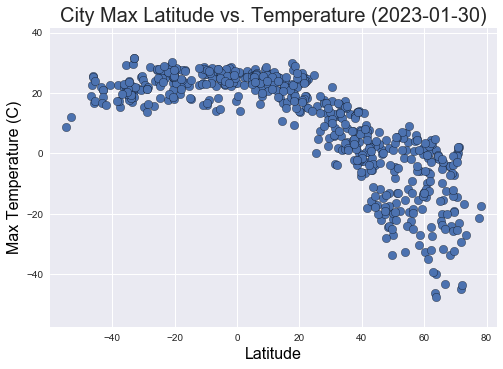

In [23]:
# Build scatter plot for latitude vs. temperature
plt.style.use("seaborn")
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black',  s=[70])


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Max Temperature (C)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

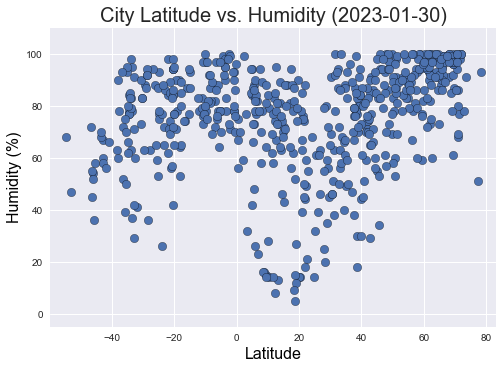

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.style.use("seaborn")
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black',  s=[70])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylim(min(city_data_df['Humidity'])-10, max(city_data_df['Humidity'])+10)
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

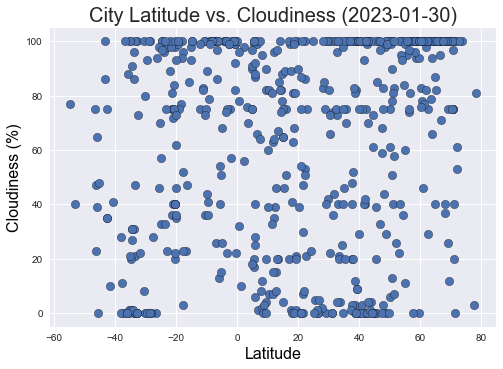

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.style.use("seaborn")
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black',  s=[70])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
#plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Cloudiness'])+10)
#plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

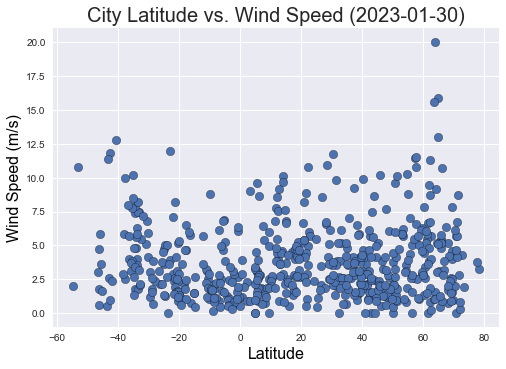

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.style.use("seaborn")
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black',  s=[70])


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Wind Speed (m/s)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
#plt.ylim(min(city_data_df['Wind Speed'])-10, max(city_data_df['Wind Speed'])+10)
#plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def linear_regres(x_val, y_val):
    
    (slope, intercept, rvalue, pvalue, stderr)  = stats.linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_values, 'darkred', linewidth=2)
    plt.annotate(line_eq, (1,1), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urengoy,65.9667,78.3667,-15.57,95,100,5.37,RU,1675120312
2,ostrovnoy,68.0531,39.5131,-4.06,91,100,5.20,RU,1675120312
3,raudeberg,61.9875,5.1352,1.09,73,98,3.83,NO,1675120313
5,oskemen,49.9565,82.6119,-27.02,69,75,0.00,KZ,1675120314
7,victoria,22.2855,114.1577,15.21,59,53,4.92,HK,1675120293


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flinders,-34.5833,150.8552,23.99,78,91,1.79,AU,1675120114
4,lebu,-37.6167,-73.6500,15.46,78,0,9.99,CL,1675120313
6,namibe,-15.1961,12.1522,22.41,77,98,1.46,AO,1675120314
8,avarua,-21.2078,-159.7750,27.03,74,40,8.23,CK,1675120315
12,rikitea,-23.1203,-134.9692,26.28,72,23,3.92,PF,1675120317


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8252862026402349


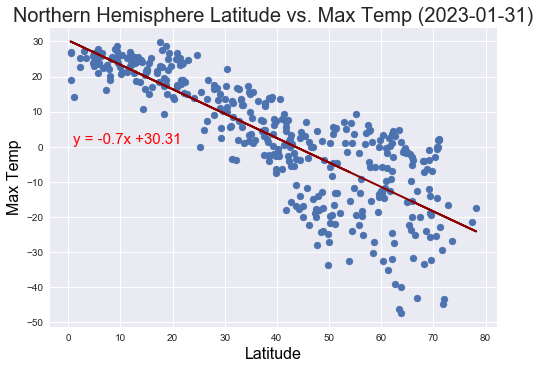

In [71]:
# Linear regression on Northern Hemisphere
linear_regres(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.title('Northern Hemisphere Latitude vs. Max Temp ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Max Temp', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

The r-value is: 0.3732243007358754


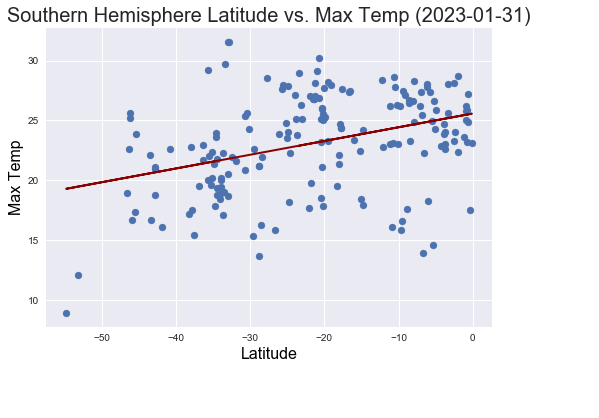

In [72]:
# Linear regression on Southern Hemisphere
linear_regres(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.title('Southern Hemisphere Latitude vs. Max Temp ' + '(' + str(date.today()) + ')', fontsize=20)
plt.ylabel('Max Temp', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between temperature and latitude in the northern hemisphere data, concluding that the farther you get north of the equator, the lower the temperatures. There is a weak positive correlation between maximum temperatures in the southern hemisphere and their distance from the equator. The variance is greater in the southern hemisphere than in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4654857696561244


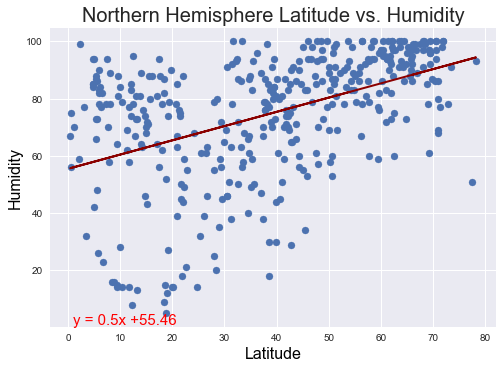

In [76]:
# Northern Hemisphere
linear_regres(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.title('Northern Hemisphere Latitude vs. Humidity', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

The r-value is: 0.4575458305888871


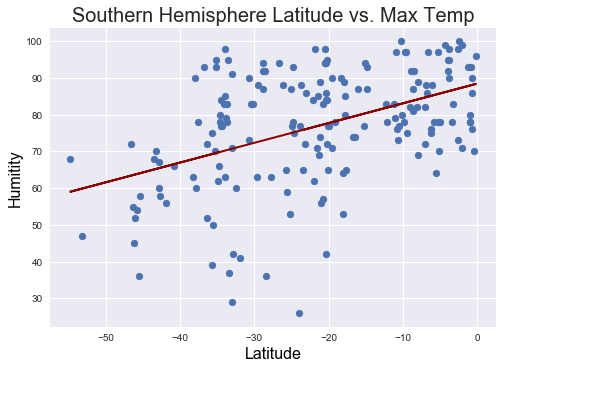

In [75]:
# Southern Hemisphere
linear_regres(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.title('Southern Hemisphere Latitude vs. Max Temp', fontsize=20)
plt.ylabel('Humitity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation in both northern and southern hemispheric latitudes and humidity. In each hemisphere, we see that it gets more humid the closer we get to the equator, however the further we move from the equator the less correlation is observed.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.28342226364944934


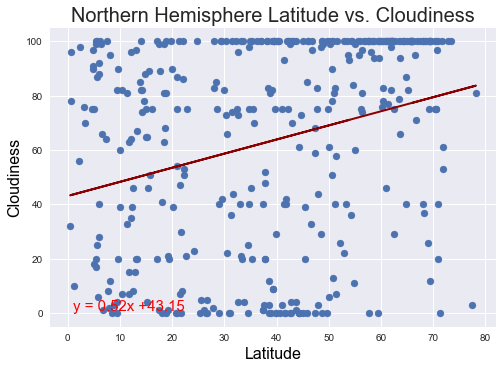

In [77]:
# Northern Hemisphere
linear_regres(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.title('Northern Hemisphere Latitude vs. Cloudiness', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

The r-value is: 0.4122624592237397


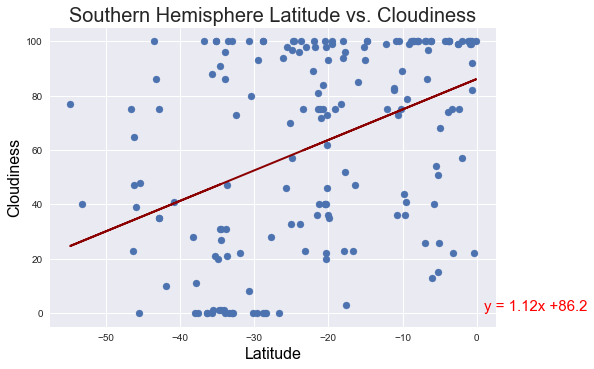

In [78]:
# Southern Hemisphere
linear_regres(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.title('Southern Hemisphere Latitude vs. Cloudiness', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between cloudiness and latitude in neither the northern nor southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09686778729498798


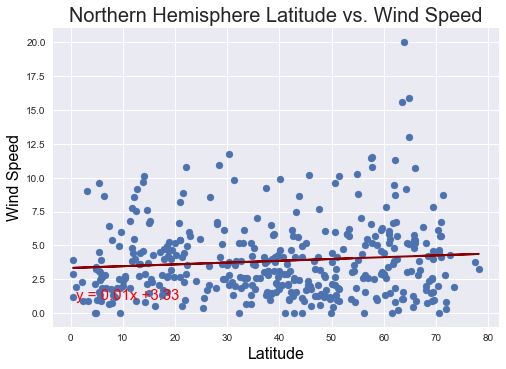

In [80]:
# Northern Hemisphere
linear_regres(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.title('Northern Hemisphere Latitude vs. Wind Speed', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

The r-value is: -0.3651575233091987


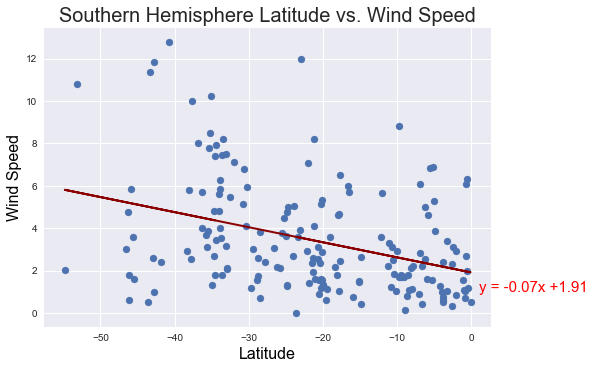

In [79]:
# Southern Hemisphere
linear_regres(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.title('Southern Hemisphere Latitude vs. Wind Speed', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.show()

**Discussion about the linear relationship:** There is a very slight positive correlation between wind speed and latitude in the northern hemisphere, and a slight negative correlation between wind speed and latitude in the southern hemisphere. The wind speed seems to get higher the further from the equator in either direction. The wind speeds in the northern hemisphere tend to range from about 0 to 10 mph.